<a href="https://colab.research.google.com/github/SoumyaShreeram/Microlensing_with_NeuralNets/blob/master/09_Plotting_combined_Loss_Accuracy_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Plotting loss and accuracy curves

Notbook plots the loss and accuracy curves for the following case:
1. No season gaps
2. With season gaps
3. Linear interpolation and season gaps
4. GP and season gaps

Author: Soumya Shreeram <br>
Date: 27th May 2020

Import all required python libraries

In [0]:
from google.colab import drive
import os
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

Mount google drive

Directory where the `python` files are stored on Google Drive. These imported files are also available in `.ipynb` format on the GitHub repo with same names (without the nb; <strike>`dr`</strike>`0X_sameFileName`). nb stands for notebook. 

In [92]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
os.chdir('/content/gdrive/My Drive/Colab Notebooks')

import nb_02i_preprocessing_data as dat
import nb_03_neural_network_designs as nnet

Setting up the path to the data directory

In [0]:
current_dir = os.getcwd()
data_dir = '/content/gdrive/My Drive/training_set_microlensing/'
save_image_dir = r'/content/gdrive/My Drive/Colab Notebooks/Images/'
save_model_dir = r'/content/gdrive/My Drive/Colab Notebooks/Models/'
save_data_dir = r'/content/gdrive/My Drive/Colab Notebooks/Data/'

Parameters

In [0]:
keywords = ['no_gaps', 'gaps', 'gaps_linear', 'gaps_gp']
valid_color = ['#8a7e7d', '#a9ad4c']

#### Functions for plotting loss and accuracy curves

In [0]:
def setLabels(ax, xlabel, ylabel, ticks, legend):
    """
    Function sets the axes labels, legent size, and ticks
    """
    ax.set_xlabel(xlabel, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=20)
    if legend:
        ax.legend(fontsize=14)
    ax.grid()
    if ticks:
        ax.tick_params(which='both', labelsize=18)
    return

def plotLoss(ax, history, loss_Accuracy, model_name, linestyle, color, valid_color):
    """
    Function plots the loss curve for training run of x epochs
    @valid_color :: color code for the validation curve if multiple cases are plotted together
    """
    ax.plot(history[loss_Accuracy[0]], color=color, linestyle= linestyle, lw=2, label=model_name)
    ax.plot(history[loss_Accuracy[1]], valid_color, linestyle= linestyle, lw=2) 
    setLabels(ax, '', r'$\mathcal{L}\ \equiv$ Categorical cross entropy', ticks=True, legend=True)
    return

def plotAccuracy(ax, history, loss_Accuracy, model_name, linestyle, color, valid_color):
    """
    Function plots the accuracy curve for training run of x epochs
    @multiple_models :: boolean to check if multiple epochs are plotted together
    """
    ax.plot(history[loss_Accuracy[2]],  color=color, linestyle= linestyle, lw=2, label=model_name)
    ax.plot(history[loss_Accuracy[3]], valid_color, linestyle= linestyle, lw=2)
    setLabels(ax, 'Epoch', 'Accuracy', ticks=True, legend=True)
    return

def decideColor(input_word):
  " Function decides the color of the loss and accuracy curves"
  
  key_word_arr = ['no_gaps', 'gaps', 'gaps_linear', 'gaps_gp']
  colors_arr = ['#0786db', '#d60939', '#08c424','#5208c9']
  
  for idx, key_word in enumerate(key_word_arr):  
    if input_word == key_word:
      color = colors_arr[idx]
  return color

def plotLACurves(fig, ax, key_word, networks, model_name, valid_color):
  """
  Function plos the loss and accuracy curves
  @fig, ax :: figure and axis handles
  @key_word :: decides the type of curves that needs to be plotted (e.g. 'no_gaps')
  @networks :: array with [loss, valid_loss, acc, valid_acc] for the different networks
  @model_name :: arr with the names of the networks
  """
  color = decideColor(key_word)
  loss_Accuracy = [0, 1, 2, 3]
  
  linestyle = ['-.', ':', '-']

  # plotting the curves
  for i, num in enumerate(networks):
    plotLoss(ax[0], num, loss_Accuracy, model_name[i], linestyle[i], color, valid_color)
    plotAccuracy(ax[1], num, loss_Accuracy, model_name[i], linestyle[i], color, valid_color)

  fig.savefig(save_image_dir+'/LandA_%s.png'%key_word)    
  fig.tight_layout()
  return

### 1. Plotting Loss and Accuracy curves for the case without season gaps

In [0]:
cnn_no_gaps = np.load(save_data_dir+'noSeasonGaps_CNN.npy')
# [todo: generate this file again] resnet_7_no_gaps = np.load(save_data_dir+'noSeasonGaps_ResNet7.npy')
resnet_18_no_gaps = np.load(save_data_dir+'noSeasonGaps_ResNet18.npy')

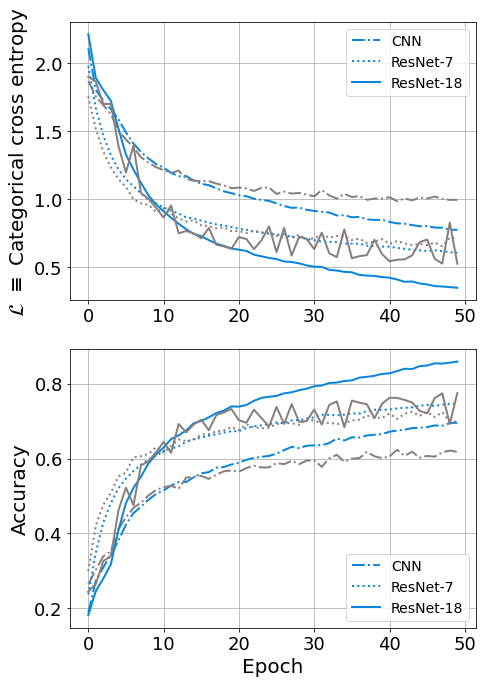

In [73]:
no_gaps = [cnn_no_gaps, resnet_7_no_gaps, resnet_18_no_gaps]
model_name_no_gaps = ['CNN', 'ResNet-7', 'ResNet-18']

# plots the history
fig, ax = plt.subplots(2, 1, figsize=(7, 10))
plotLACurves(fig, ax, keywords[0], no_gaps, model_name_no_gaps, valid_color[0])

### 2. Plots Loss and Accuracy curves for the fitted light curves with season gaps

In [0]:
# loading loss-accuracy files for GPR (Gaussian processes regression)
resnet_7_gp_gaps = np.load(save_data_dir+'SeasonGaps_GP_ResNet7.npy')
resnet_18_gp_gaps = np.load(save_data_dir+'SeasonGaps_GP_ResNet18.npy')

# loading loss-accuracy files for LI (Linear Interpolation)
resnet_7_li_gaps = np.load(save_data_dir+'SeasonGaps_LI_ResNet7.npy')
resnet_18_li_gaps = np.load(save_data_dir+'SeasonGaps_LI_ResNet18.npy')

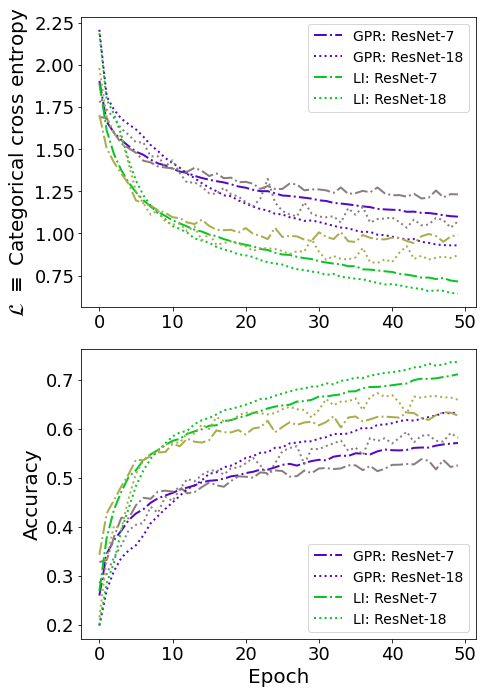

In [108]:
gpr_gaps = [resnet_7_gp_gaps, resnet_18_gp_gaps]
model_name_gpr = ['GPR: ResNet-7', 'GPR: ResNet-18']
valid_colors = ['#8a7e7d', '#a9ad4c']

fig, ax = plt.subplots(2, 1, figsize=(7, 10))
# plots the curves for GPR
plotLACurves(fig, ax, keywords[3], gpr_gaps, model_name_gpr, valid_color[0])

li_gaps = [resnet_7_li_gaps, resnet_18_li_gaps]
model_name_li  = ['LI: ResNet-7', 'LI: ResNet-18']

# plots the curves for LI
plotLACurves(fig, ax, keywords[2], li_gaps, model_name_li, valid_color[1])